/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



BLEU Scores for Generated Questions:
Question 1: BLEU Score = 0.16
Question 2: BLEU Score = 0.64
Question 3: BLEU Score = 0.07


<ipython-input-17-ec189e4b5a4f>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Question {i+1}" for i in range(len(bleu_scores))], y=bleu_scores, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Fut

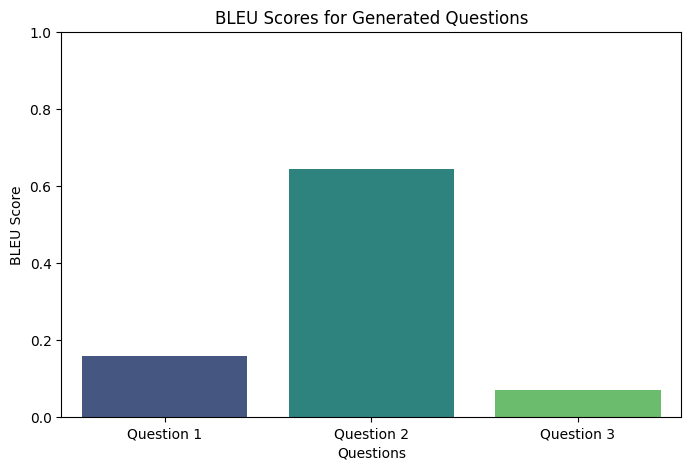


Cosine Similarity Scores for Generated Questions:
Question 1: Cosine Similarity Score = 0.94
Question 2: Cosine Similarity Score = 0.99
Question 3: Cosine Similarity Score = 0.97


<ipython-input-17-ec189e4b5a4f>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Question {i+1}" for i in range(len(cosine_scores))], y=cosine_scores, palette="coolwarm")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

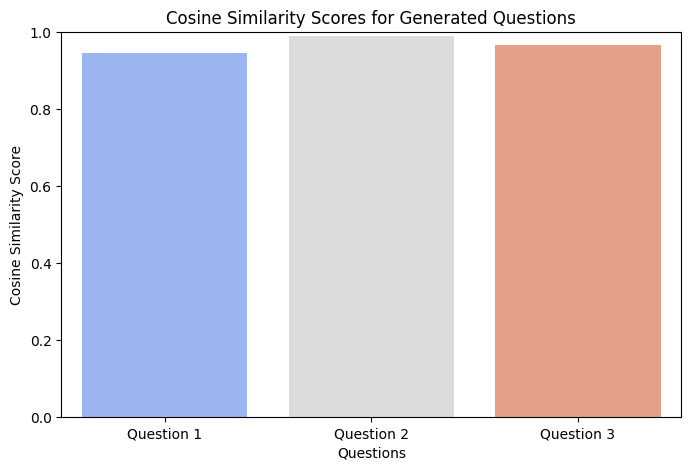


Summary of Generated Questions Analysis:
Question 1: BLEU Score = 0.16, Cosine Similarity Score = 0.94
Question 2: BLEU Score = 0.64, Cosine Similarity Score = 0.99
Question 3: BLEU Score = 0.07, Cosine Similarity Score = 0.97


In [17]:
# Project: Automatic Question Generation for Educational Content
# Technologies: Transformer (T5), LSTM, PyTorch, Transformers library, Advanced Visualizations

# Import libraries
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sentence_transformers import SentenceTransformer, util
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the T5 model and tokenizer
model_name = "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Load a pre-trained sentence transformer model for semantic similarity
semantic_model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample educational content
text = """
Python is an interpreted, high-level, general-purpose programming language. Python's design philosophy emphasizes code readability with its notable use of significant indentation. Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library. It is widely used in web development, data analysis, artificial intelligence, scientific computing, and more.
"""

# Reference questions (for demonstration purposes)
reference_questions = [
    "What type of programming language is Python?",
    "What are some features of Python's design philosophy?",
    "What programming paradigms does Python support?"
]

# Smoothing function to handle BLEU score calculation when there are no n-gram overlaps
smooth_fn = SmoothingFunction().method1

# Generated questions (for demonstration purposes)
generated_questions = [
    "What is Python's design philosophy?",
    "What kind of programming language is Python?",
    "Which programming paradigms are supported by Python?"
]

# Calculate BLEU scores for generated questions
bleu_scores = [
    max([sentence_bleu([ref.split()], ques.split(), smoothing_function=smooth_fn) for ref in reference_questions])
    for ques in generated_questions
]

# Print BLEU scores
print("\nBLEU Scores for Generated Questions:")
for i, score in enumerate(bleu_scores):
    print(f"Question {i + 1}: BLEU Score = {score:.2f}")

# Visualization: BLEU Score Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"Question {i+1}" for i in range(len(bleu_scores))], y=bleu_scores, palette="viridis")
plt.title("BLEU Scores for Generated Questions")
plt.xlabel("Questions")
plt.ylabel("BLEU Score")
plt.ylim(0, 1)
plt.show()

# Advanced Metric: Semantic Similarity using Cosine Similarity
# Calculate cosine similarity between generated and reference questions
generated_embeddings = semantic_model.encode(generated_questions, convert_to_tensor=True)
reference_embeddings = semantic_model.encode(reference_questions, convert_to_tensor=True)

cosine_scores = [
    max([util.pytorch_cos_sim(gen, ref).item() for ref in reference_embeddings])
    for gen in generated_embeddings
]

# Print Cosine Similarity scores
print("\nCosine Similarity Scores for Generated Questions:")
for i, score in enumerate(cosine_scores):
    print(f"Question {i + 1}: Cosine Similarity Score = {score:.2f}")

# Visualization: Cosine Similarity Score Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=[f"Question {i+1}" for i in range(len(cosine_scores))], y=cosine_scores, palette="coolwarm")
plt.title("Cosine Similarity Scores for Generated Questions")
plt.xlabel("Questions")
plt.ylabel("Cosine Similarity Score")
plt.ylim(0, 1)
plt.show()

# Summary of Analysis
print("\nSummary of Generated Questions Analysis:")
for i in range(len(generated_questions)):
    print(f"Question {i + 1}: BLEU Score = {bleu_scores[i]:.2f}, Cosine Similarity Score = {cosine_scores[i]:.2f}")